In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from itertools import cycle, islice

In [2]:
plt.rcParams['figure.figsize'] = 12,8

In [ ]:
np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
# Оставляем только признаки датасета, т.к. для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы
X, y = datasets.make_blobs(n_samples = n_samples, random_state=170)
transformation = [[0.6, -0.6],[-0.4, 0.8]]
aniso = np.dot(X,transformation)

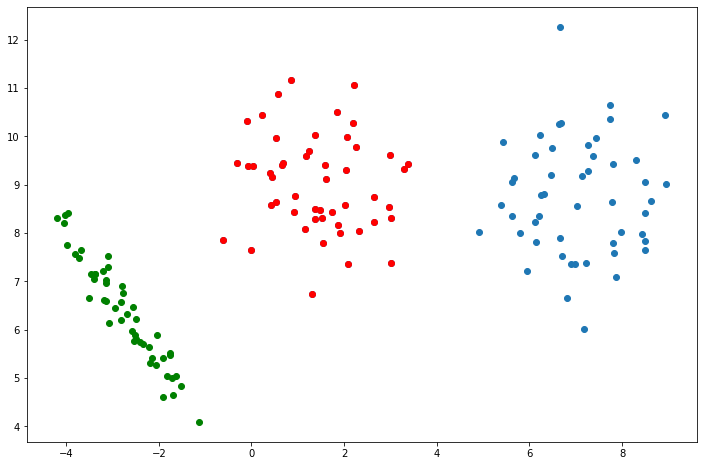

In [81]:
data = datasets.make_blobs(n_samples = 100, centers=2)
X, y = data
plt.scatter(X[:,0],X[:,1])
table = pd.DataFrame(X)
table['target'] = y
#table[table.target==0][0]
transformation = [[0.6, -0.6],[-0.4, 0.8]]
X_1 = np.array(table[table.target==1].drop('target', axis=1))
#X_1
aniso = np.dot(X_1,transformation)
plt.scatter(table[table.target==1][0],table[table.target==1][1], color='red')
plt.scatter(aniso[:,0],aniso[:,1], color='green')


In [59]:
data = datasets.make_blobs(n_samples = 100, centers=2)
X, y = data
X

array([[ -8.75428759,   3.77272918],
       [  2.73718516,  -7.04390428],
       [ -8.913715  ,   3.88027393],
       [ -8.50221482,   4.16078744],
       [ -0.09938009,  -9.02097587],
       [  1.0366727 ,  -6.52542577],
       [ -7.12762434,   3.19489123],
       [ -7.82799068,   3.07459091],
       [-10.96391928,   5.89252861],
       [ -8.08636281,   4.41668837],
       [  1.03662131,  -5.95634461],
       [  2.82756881,  -7.87485338],
       [  3.00156193,  -8.43303521],
       [ -9.19682584,   3.86339646],
       [  2.66398047,  -7.84859006],
       [  0.75011309,  -8.06072194],
       [ -8.37895561,   3.91400552],
       [  3.54604252,  -7.92575153],
       [ -9.93970244,   5.41437743],
       [ -5.61799799,   4.48560918],
       [  2.02161392,  -7.19873196],
       [  2.38048256,  -8.84738962],
       [ -8.07696507,   3.33690451],
       [  2.36936591,  -7.86942931],
       [  2.43287411,  -8.55985067],
       [  3.25026457, -11.51508348],
       [  3.11725129,  -8.64005358],
 

In [57]:
?np.random.rand